# FH MTM Data Project Group 1

## Project Assignment
- select a dataset of your choice (min 50.000 records, min 8 attributes / features, 1 feature being a time stamp) [5p]
- analyse this dataset using
    - a classification method [5p]
    - a cluster method [5p]
    - a time series method [5p]
- visualize the results (using tailored visualization, see Nussbaumer Knaflic) [3p]
- write a brief (2 - 3 page) summary in the style of a scientific paper summarizing your research, methods and results [7p]

(Upload your data, calculations (as Jupyter Notebooks) and paper (as PDF))

## Select a Dataset
Choose a dataset of your choice with a minimum of 50,000 records and at least 8 attributes/features, one of which must be a time stamp. [5 points]
Dataset open source: https://www.kaggle.com/datasets/thedevastator/unlock-profits-with-e-commerce-sales-data/data

This dataset offers a comprehensive analysis of e-commerce sales profitability. It includes detailed information on various sales channels such as Shiprocket and INCREFF, along with financial data related to expenses and profits. The dataset features columns containing SKU codes, design numbers, stock levels, product categories, sizes, and colors. Additionally, it includes MRPs (Maximum Retail Prices) from multiple stores including Ajio, Amazon (regular and FBA), Flipkart, Limeroad, Myntra, and Paytm. Key financial parameters such as the amount paid by customers, rate per piece for each transaction, and transactional details like sale dates, months, categories, fulfillment status, quantity, currency, and gross amounts are also included. This dataset is essential for anyone looking to analyze the profitability of e-commerce sales in the current market landscape.

### Data Preprocessing
In the fisrt step we import the required packages. Then we load the dataset in csv format and clean and prepare it for the analysis:

- **Handle Missing Values**: We drop rows with any missing values to ensure our analysis is based on complete data.
- **Convert Date Type**: The 'Date' column is converted to a datetime format to facilitate time-based analysis.
- **Feature Engineering**: We extract the year and month from the 'Date' column to create new features that can be used in our analysis.

This step is crucial as it ensures the dataset is clean and the features are in a suitable format for the subsequent analysis.

### Data Analysis
Perform analysis on this dataset using the following methods:

- **A classification method**: Predict a outcome using the random forest methode and visualize the result with a confusion matrix and a feature importance plot
- **A clustering method**:
- **A time series method**:




## Data Preprocessing

### Install and import Packages

Import load the csv File and display the basic information of the dataset </h5>
<p></p>
<p> Pandas: For data manipulation and analysis.
<p></p>
NumPy: For numerical operations and handling arrays.</p>

In [5]:
# Import packages 
import pandas as pd
import numpy as np

# Load the dataset
file_path = r'C:\Users\patri\Desktop\Sandbox\fh_mtm_data\fh_mtm_data_projekt_group1\data_set_amazon_sale_report.csv'
data = pd.read_csv(file_path)

# Display basic information about the dataset
print(data.info())

# Display the first lines of the dataset
print(data.head())

print(data.apply(pd.unique).to_frame(name='Unique Values'))
print(data.describe().T)

ModuleNotFoundError: No module named 'pandas'

### Handle Missing Values

Scan the dataset for missing or inconsistent values and evaluat the necessity of them.

In [ ]:
# Identify columns with null values
null_columns = data.columns[data.isnull().any()]

# Display columns with the count of null values
null_counts = data[null_columns].isnull().sum()
print(null_counts)

Courier Status       6872
currency             7795
Amount               7795
ship-city              33
ship-state             33
ship-postal-code       33
ship-country           33
promotion-ids       49153
fulfilled-by        89698
Unnamed: 22         49050
dtype: int64


Remove columns not needed and the lines with null values. Check the data for duplicates and validate if you can drop them.

In [ ]:
# Remove columns with a large number of null values
columns_to_remove = ['promotion-ids', 'fulfilled-by', 'Unnamed: 22']
data_clean = data.drop(columns=columns_to_remove)

# Remove rows with null values in specific columns
columns_with_nulls = ['Courier Status', 'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code', 'ship-country']
data_clean = data_clean.dropna(subset=columns_with_nulls)

# Verify the data cleaning steps
print(data_clean.info())
print(data_clean.head())

<class 'pandas.core.frame.DataFrame'>
Index: 116016 entries, 1 to 128974
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               116016 non-null  int64  
 1   Order ID            116016 non-null  object 
 2   Date                116016 non-null  object 
 3   Status              116016 non-null  object 
 4   Fulfilment          116016 non-null  object 
 5   Sales Channel       116016 non-null  object 
 6   ship-service-level  116016 non-null  object 
 7   Style               116016 non-null  object 
 8   SKU                 116016 non-null  object 
 9   Category            116016 non-null  object 
 10  Size                116016 non-null  object 
 11  ASIN                116016 non-null  object 
 12  Courier Status      116016 non-null  object 
 13  Qty                 116016 non-null  int64  
 14  currency            116016 non-null  object 
 15  Amount              116016 non-null  fl

Check the values of each column and potentially remove the ones having only one value (Sales Channel= Amazon.in; Currency= INR; ship-country= IN).

In [ ]:
# Count the number of different values per column
unique_values_per_column = data_clean.nunique()
print(unique_values_per_column)

index                 116016
Order ID              108271
Date                      91
Status                    12
Fulfilment                 2
Sales Channel              1
ship-service-level         2
Style                   1371
SKU                     7132
Category                   9
Size                      11
ASIN                    7128
Courier Status             2
Qty                        6
currency                   1
Amount                   867
ship-city               8499
ship-state                67
ship-postal-code        9142
ship-country               1
B2B                        2
dtype: int64


In [ ]:
# Remove columns with only on values
columns_to_remove = ['Sales Channel ', 'currency', 'ship-country']
data_clean = data_clean.drop(columns=columns_to_remove)

# Count the number of different values per column
unique_values_per_column = data_clean.nunique()
print(unique_values_per_column)

# Verify the data cleaning steps
print(data_clean.info())

index                 116016
Order ID              108271
Date                      91
Status                    12
Fulfilment                 2
ship-service-level         2
Style                   1371
SKU                     7132
Category                   9
Size                      11
ASIN                    7128
Courier Status             2
Qty                        6
Amount                   867
ship-city               8499
ship-state                67
ship-postal-code        9142
B2B                        2
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 116016 entries, 1 to 128974
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               116016 non-null  int64  
 1   Order ID            116016 non-null  object 
 2   Date                116016 non-null  object 
 3   Status              116016 non-null  object 
 4   Fulfilment          116016 non-null  object 
 5   ship

### Convert Date Type

Check the datatypes of every column and change them in case it makes sense.

In [ ]:
# Get the data types of all columns in the cleaned dataset
column_data_types = data_clean.dtypes
print(column_data_types)

index                   int64
Order ID               object
Date                   object
Status                 object
Fulfilment             object
ship-service-level     object
Style                  object
SKU                    object
Category               object
Size                   object
ASIN                   object
Courier Status         object
Qty                     int64
Amount                float64
ship-city              object
ship-state             object
ship-postal-code      float64
B2B                      bool
dtype: object


In [ ]:
# Convert the date an order into date format
data_clean['Date'] = pd.to_datetime(data_clean['Date'], format='%m-%d-%y')
# Change the status of an order into category as there are fixed values
data_clean['Status'] = data_clean['Status'].astype('category')
# Change the Fulfilment of an order into category after is only distribution via Merchant or Amazon possible
data_clean['Fulfilment'] = data_clean['Fulfilment'].astype('category')
# Change the Fulfilment of an order into category as there is only Standard or Expedited
data_clean['ship-service-level'] = data_clean['ship-service-level'].astype('category')
# Change the Category of an order into category as there are fixed types of goods
data_clean['Category'] = data_clean['Category'].astype('category')
# Change the Size of an order into category as there are fixed clothing sizes for the goods
data_clean['Size'] = data_clean['Size'].astype('category')
# Change the Courier Status of an order into category as there is only Shipped, Unshipped or Canceled possible
data_clean['Courier Status'] = data_clean['Courier Status'].astype('category')
# Change the ship-postal-code of an order into object as the values are postal codes
data_clean['ship-postal-code'] = data_clean['ship-postal-code'].astype('object') 
# Change the B2B information into bool as the values are either false or true
data_clean['B2B'] = data_clean['B2B'].astype('bool')

# Verify the updated data types
print(data_clean.dtypes)


index                          int64
Order ID                      object
Date                  datetime64[ns]
Status                      category
Fulfilment                  category
ship-service-level          category
Style                         object
SKU                           object
Category                    category
Size                        category
ASIN                          object
Courier Status              category
Qty                            int64
Amount                       float64
ship-city                     object
ship-state                    object
ship-postal-code              object
B2B                             bool
dtype: object


### Feature Engineering 

Create new features if necessary, such as extracting month or year from the Date column.

**Day of the Week and Sepeation of Year & Month**

Extract the day of the week from the Date column to see if there are patterns related to specific days (e.g., higher sales on weekends).

In [ ]:
# Feature Engineering: Extract month and year from 'Date'
data_clean['Year'] = data_clean['Date'].dt.year
data_clean['Month'] = data_clean['Date'].dt.month
data_clean['DayOfWeek'] = data_clean['Date'].dt.dayofweek


# Display cleaned data information
print(data_clean.info())
print(data_clean.head())

<class 'pandas.core.frame.DataFrame'>
Index: 116016 entries, 1 to 128974
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   index               116016 non-null  int64         
 1   Order ID            116016 non-null  object        
 2   Date                116016 non-null  datetime64[ns]
 3   Status              116016 non-null  category      
 4   Fulfilment          116016 non-null  category      
 5   ship-service-level  116016 non-null  category      
 6   Style               116016 non-null  object        
 7   SKU                 116016 non-null  object        
 8   Category            116016 non-null  category      
 9   Size                116016 non-null  category      
 10  ASIN                116016 non-null  object        
 11  Courier Status      116016 non-null  category      
 12  Qty                 116016 non-null  int64         
 13  Amount              116016 non-nul

**Day of the Month**

Extract the day of the month to check for patterns related to specific days (e.g., end-of-month sales spikes).

In [ ]:
data_clean['DayOfMonth'] = data_clean['Date'].dt.day

**Is Weekend**

Create a binary feature indicating whether a date falls on a weekend in order to see if there are patterns on weekends.

In [ ]:
data_clean['IsWeekend'] = data_clean['DayOfWeek'].isin([5, 6])

**Region**

Segment the values in 'ship-state' into six regions of india 

In [ ]:
# Change values into caps lock to fit to the maping rules
data_clean['ship-state'] = data_clean['ship-state'].str.upper()
print(data_clean['ship-state'].head())

1        KARNATAKA
2      MAHARASHTRA
4       TAMIL NADU
5    UTTAR PRADESH
6       CHANDIGARH
Name: ship-state, dtype: object


In [ ]:
# List of states by region
north_states = ['JAMMU & KASHMIR', 'HIMACHAL PRADESH', 'Punjab', 'UTTARAKHAND', 'HARYANA', 'Delhi', 'UTTAR PRADESH', 'Chandigarh', 'LADAKH', 'New Delhi', 'PB', 'Punjab/Mohali/Zirakpur']
south_states = ['ANDHRA PRADESH', 'KARNATAKA', 'KERALA', 'TAMIL NADU', 'TELANGANA', 'Pondicherry', 'Puducherry', 'LAKSHADWEEP']
east_states = ['Bihar', 'JHARKHAND', 'Odisha', 'WEST BENGAL', 'ANDAMAN & NICOBAR ', 'Orissa']
west_states = ['Goa', 'Gujarat', 'MAHARASHTRA', 'DADRA AND NAGAR', 'RAJSHTHAN', 'RJ', 'RAJSTHAN', 'RAJASTHAN']
central_states = ['MADHYA PRADESH', 'CHHATTISGARH']
northeast_states = ['ARUNACHAL PRADESH', 'ASSAM', 'Manipur', 'MEGHALAYA', 'Mizoram', 'Nagaland', 'Sikkim', 'TRIPURA', 'AR', 'NL']

# Convert all state names to uppercase
north_states = [state.upper() for state in north_states]
south_states = [state.upper() for state in south_states]
east_states = [state.upper() for state in east_states]
west_states = [state.upper() for state in west_states]
central_states = [state.upper() for state in central_states]
northeast_states = [state.upper() for state in northeast_states]


# Function to get region
def get_region(state):
    if state in north_states:
        return 'North'
    elif state in south_states:
        return 'South'
    elif state in east_states:
        return 'East'
    elif state in west_states:
        return 'West'
    elif state in central_states:
        return 'Central'
    elif state in northeast_states:
        return 'Northeast'
    else:
        return 'Other'

# Applying the function to create a new column 'Region'
data_clean['Region'] = data_clean['ship-state'].apply(get_region)
print(data_clean.head())


   index             Order ID       Date                        Status  \
1      1  171-9198151-1101146 2022-04-30  Shipped - Delivered to Buyer   
2      2  404-0687676-7273146 2022-04-30                       Shipped   
4      4  407-1069790-7240320 2022-04-30                       Shipped   
5      5  404-1490984-4578765 2022-04-30                       Shipped   
6      6  408-5748499-6859555 2022-04-30                       Shipped   

  Fulfilment ship-service-level    Style              SKU Category Size  ...  \
1   Merchant           Standard  JNE3781  JNE3781-KR-XXXL    kurta  3XL  ...   
2     Amazon          Expedited  JNE3371    JNE3371-KR-XL    kurta   XL  ...   
4     Amazon          Expedited  JNE3671  JNE3671-TU-XXXL      Top  3XL  ...   
5     Amazon          Expedited   SET264  SET264-KR-NP-XL      Set   XL  ...   
6     Amazon          Expedited    J0095      J0095-SET-L      Set    L  ...   

     ship-city     ship-state  ship-postal-code    B2B  Year Month DayOfWe

In [ ]:
other_states = data_clean[data_clean['Region'] == 'Other']

# Print all state names where region is "Other"
print(other_states['ship-state'].tolist())

[]


**Order Size**

Calculate the total order size by multiplying Qty with the Amount (if each row represents a line item, otherwise directly use Amount).

In [ ]:
data_clean['OrderSize'] = data_clean['Qty'] * data_clean['Amount']

**Price per Item**

Calculate the price per item if Qty and Amount represent total quantity and total amount.


In [ ]:
data_clean['PricePerItem'] = data_clean['Amount'] / data_clean['Qty']

In [ ]:
print(data_clean.apply(pd.unique).to_frame(name='Unique Values'))

                                                        Unique Values
index               [1, 2, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, ...
Order ID            [171-9198151-1101146, 404-0687676-7273146, 407...
Date                [2022-04-30T00:00:00.000000000, 2022-04-29T00:...
Status              ['Shipped - Delivered to Buyer', 'Shipped', 'C...
Fulfilment          ['Merchant', 'Amazon']
Categories (2, object):...
ship-service-level  ['Standard', 'Expedited']
Categories (2, objec...
Style               [JNE3781, JNE3371, JNE3671, SET264, J0095, JNE...
SKU                 [JNE3781-KR-XXXL, JNE3371-KR-XL, JNE3671-TU-XX...
Category            ['kurta', 'Top', 'Set', 'Western Dress', 'Ethn...
Size                ['3XL', 'XL', 'L', 'S', 'XXL', ..., '6XL', 'M'...
ASIN                [B09K3WFS32, B07WV4JV4D, B098714BZP, B08YN7XDS...
Courier Status      ['Shipped', 'Unshipped']
Categories (2, object...
Qty                                                [1, 2, 3, 5, 4, 8]
Amount              

**Save Dataset** 

In [ ]:
# Save the cleaned dataset to a CSV file
data_clean.to_csv('clean_data_set_amazon_sale_report.csv', index=False)

## Data Analysis

### Classification methode

Predict a outcome using the random forest methode and visualize the result with a confusion matrix and a feature importance plot. The goal is to predict the region of the next sale using the sales data consisting of the following provided features (price per item, size, category of the product, style, quantity, and amount) as inputs to your model. 

In the Data Preparation we ensure that the data is clean and free of missing values, ncode categorical variables using methods like one-hot encoding and normalize or standardize numerical variables if necessary.

**Step 1: Data Preparation**

Lets any missing values and encode categorical variables.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Handle missing values (if any)
data_clean.fillna(method='ffill', inplace=True)

# Encode categorical variables
label_encoders = {}
for column in ['Region','Status', 'Fulfilment', 'ship-service-level', 'Category', 'Size', 'Courier Status', 'Date', 'Style']:
    le = LabelEncoder()
    data_clean[column] = le.fit_transform(data_clean[column])
    label_encoders[column] = le

# Define features and target variable
features = data_clean.drop(columns=['Region', 'Status', 'Fulfilment', 'ship-service-level', 'Qty', 'ship-postal-code', 'Date', 'Order ID', 'ASIN', 'Courier Status', 'ship-state', 'ship-city', 'SKU', 'index', 'B2B', 'Year', 'Month'])
target = data_clean['Region']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

C:\Users\patri\AppData\Local\Temp\ipykernel_20064\3025765591.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_clean.fillna(method='ffill', inplace=True)


((92812, 9), (23204, 9), (92812,), (23204,))

**Step 2: Model Training**

Train the Random Forest Classifier 

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

**Step 3: Model Evaluation**

Evaluate the model using the testing data.

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_rep)


Accuracy: 0.36127391828995004
Classification Report:
              precision    recall  f1-score   support

           0       0.04      0.02      0.03       657
           1       0.13      0.08      0.10      2110
           2       0.29      0.26      0.27      4934
           3       0.09      0.05      0.06       510
           4       0.47      0.58      0.52      9417
           5       0.28      0.26      0.27      5576

    accuracy                           0.36     23204
   macro avg       0.22      0.21      0.21     23204
weighted avg       0.33      0.36      0.34     23204



**Step 4: Visualization of Classification Results**

Visualize the result with a confusion matrix and a feature importance plot 

*Confusion Matrix*

A confusion matrix is a table that is often used to evaluate the performance of a classification algorithm. It summarizes the performance of a classification model by presenting the counts of true positive, true negative, false positive, and false negative predictions made by the model on a dataset.

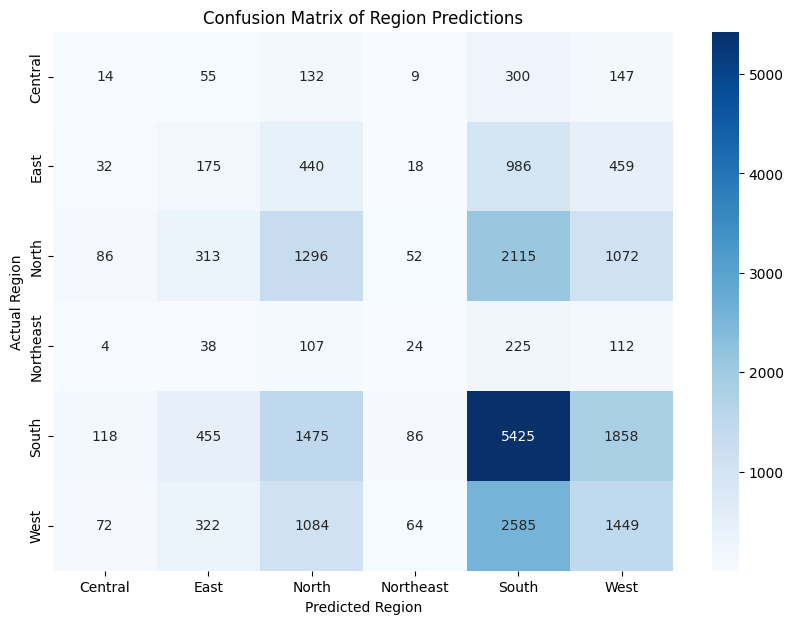

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoders['Region'].classes_, yticklabels=label_encoders['Region'].classes_)
plt.xlabel('Predicted Region')
plt.ylabel('Actual Region')
plt.title('Confusion Matrix of Region Predictions')
plt.show()


*Feature Importance Chart*

Feature importance values indicate which fields had the biggest impact on each prediction that is generated by classification or regression analysis. Each feature importance value has both a magnitude and a direction (positive or negative), which indicate how each field (or feature of a data point) affects a particular prediction.

The purpose of feature importance is to help you determine whether the predictions are sensible. Is the relationship between the dependent variable and the important features supported by your domain knowledge? The lessons you learn about the importance of specific features might also affect your decision to include them in future iterations of your trained model.

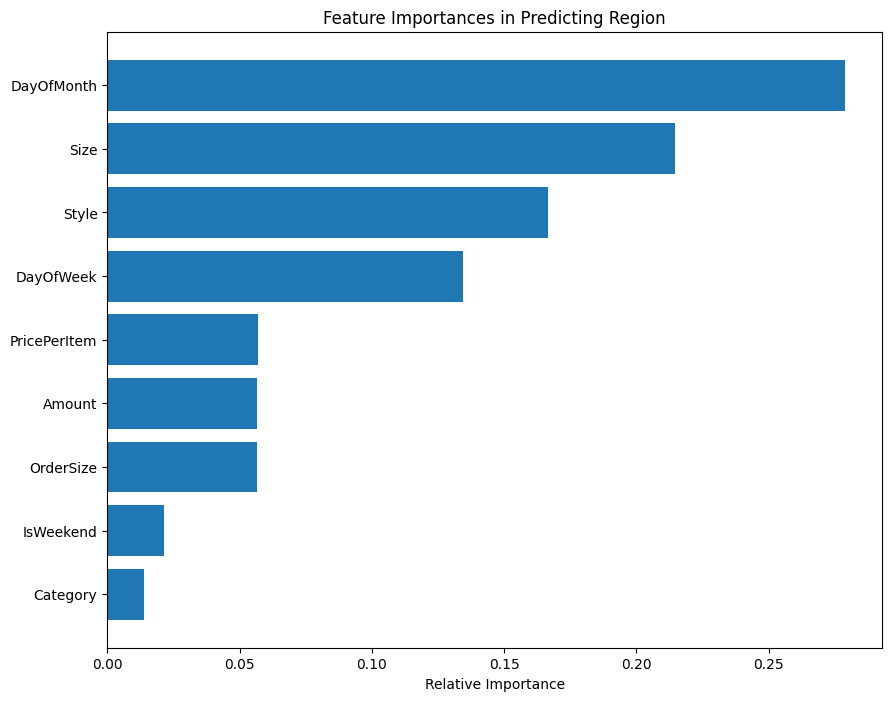

In [ ]:
# Plot feature importances
feature_importances = rf_classifier.feature_importances_
features = X_train.columns
indices = np.argsort(feature_importances)[::-1]  # Sort in descending order

plt.figure(figsize=(10, 8))
plt.title('Feature Importances in Predicting Region')
plt.barh(range(len(indices)), feature_importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()


### Cluster method

K-means: Suitable for well-separated clusters.

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# Select relevant features for clustering
features = ['Qty', 'Amount', 'PricePerItem', 'Category', 'Size', 'IsWeekend', 'Region', 'PricePerItem']
numeric_columns = data_clean.select_dtypes(include=[np.number]).columns

#cluster_analysis = data_clean.groupby('Cluster')[numeric_columns].mean()

data = data_clean[features]

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Create a DataFrame with the scaled data
data_scaled_df = pd.DataFrame(data_scaled, columns=features)


**Elbow Point**

The "elbow point" in the context of the Elbow Method for determining the optimal number of clusters in K-Means clustering is the point on the plot where the rate of decrease in inertia (within-cluster sum of squares) sharply slows down. This point is significant because it indicates the number of clusters beyond which adding more clusters does not significantly improve the model. Here’s a more detailed explanation:

Inertia: In K-Means clustering, inertia is a measure of how internally coherent the clusters are. It is calculated as the sum of squared distances between each point and the centroid of its assigned cluster. Lower inertia values generally indicate better clustering performance.

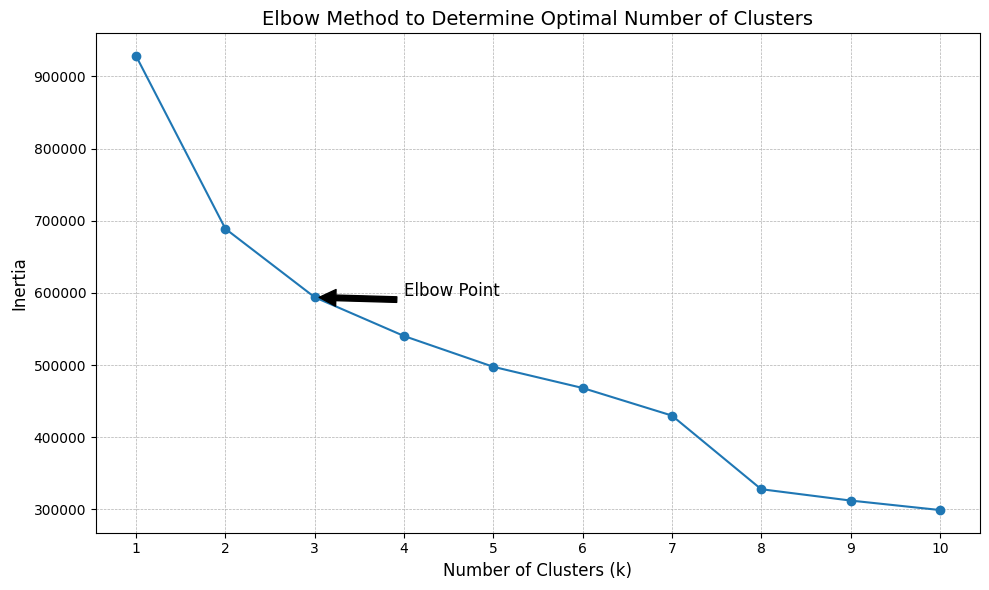

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from kneed import KneeLocator

# Data preparation
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled_df)
    inertia.append(kmeans.inertia_)

# Find the elbow point using the KneeLocator
knee_locator = KneeLocator(K, inertia, curve='convex', direction='decreasing')
elbow_point = knee_locator.elbow

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, marker='o', linestyle='-', color='#1f77b4')
plt.xticks(K)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Inertia', fontsize=12)
plt.title('Elbow Method to Determine Optimal Number of Clusters', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Annotate the "elbow" point
if elbow_point is not None:
    plt.annotate('Elbow Point', xy=(elbow_point, inertia[elbow_point-1]), xytext=(elbow_point+1, inertia[elbow_point-1]+2000),
                 arrowprops=dict(facecolor='black', shrink=0.05), fontsize=12)

plt.tight_layout()
plt.show()


**Interpreting the Elbow Point**

*Before the Elbow:* The inertia decreases rapidly as the number of clusters increases, indicating that adding more clusters significantly improves the clustering by reducing within-cluster variance.

*At the Elbo:* The point where the plot bends or forms an elbow suggests that the addition of more clusters beyond this point leads to diminishing returns. It means that increasing the number of clusters further will not result in significant improvements in clustering quality.

*After the Elbow:* The inertia continues to decrease but at a much slower rate, indicating that the additional clusters are not contributing much to reducing the within-cluster variance.

In [ ]:
# Fit the K-means model with the chosen number of clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_scaled_df)

# Assign cluster labels to each data point
data_clean['Cluster'] = kmeans.labels_

In [ ]:
# Select features for clustering
#data_clean = data_clean.drop(columns=['Style', 'Order ID', 'ASIN', 'Date', 'Status', 'Courier Status', 'Fulfilment', 'ship-service-level', 'Style', 'SKU', 'ship-city', 'ship-state', 'ship-postal-code', 'B2B', 'Year', 'Month', 'DayOfWeek', 'DayOfMonth', 'IsWeekend'])
features = data_clean[['Qty', 'Amount', 'PricePerItem']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Check data types of columns
print(data_clean.dtypes)

# Filter only numeric columns for aggregation
numeric_columns = data_clean.select_dtypes(include=[np.number]).columns
print(numeric_columns)

# Perform the cluster analysis on numeric columns
cluster_analysis = data_clean.groupby('Cluster')[numeric_columns].mean()

# Display the DataFrame
print(cluster_analysis)


index                     int64
Qty                       int64
Amount                  float64
Month                     int32
DayOfWeek                 int32
DayOfMonth                int32
IsWeekend                  bool
OrderSize               float64
PricePerItem            float64
Region_0                   bool
Region_1                   bool
Region_2                   bool
Region_3                   bool
Region_4                   bool
Region_5                   bool
Fulfilment_0               bool
Fulfilment_1               bool
ship-service-level_0       bool
ship-service-level_1       bool
Category_0                 bool
Category_1                 bool
Category_2                 bool
Category_3                 bool
Category_4                 bool
Category_5                 bool
Category_6                 bool
Category_7                 bool
Category_8                 bool
Size_0                     bool
Size_1                     bool
Size_2                     bool
Size_3  

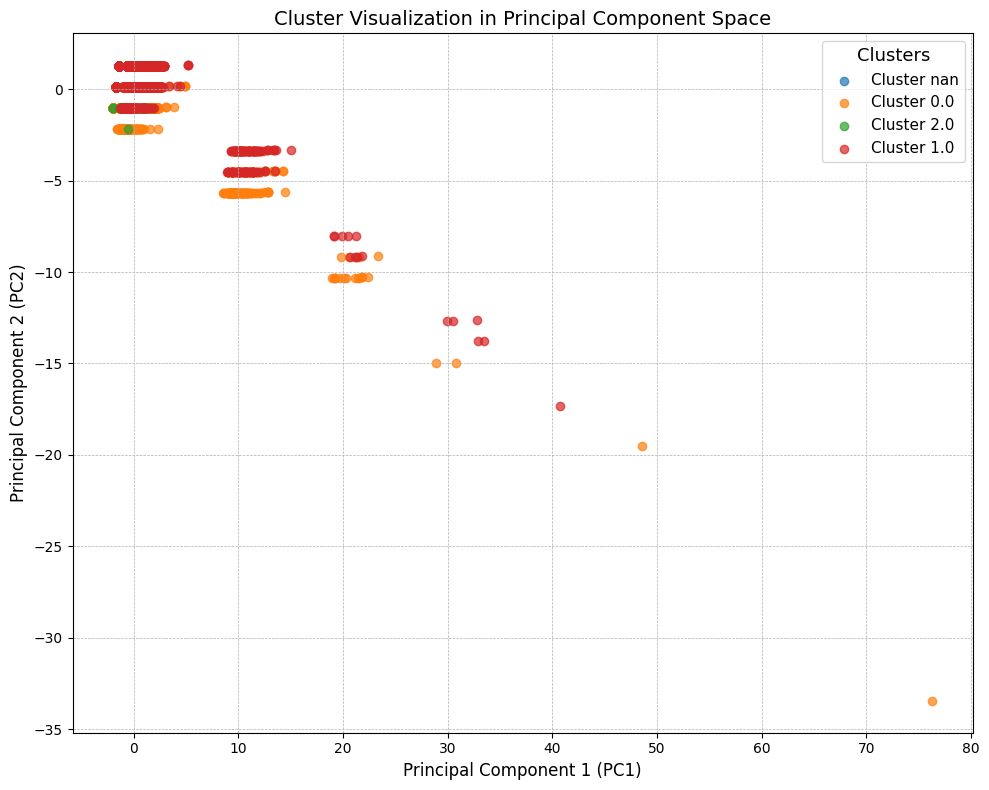

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming data_clean is already loaded as a DataFrame

# List of columns to drop if they exist
columns_to_drop = ['Style', 'Order ID', 'ASIN', 'Status', 'Courier Status', 'Year', 'ship-postal-code']

# Drop only the columns that exist in the DataFrame
data_clean = data_clean.drop(columns=[col for col in columns_to_drop if col in data_clean.columns])

# Define the list of desired features
desired_features = ['Qty', 'Amount', 'Month']

# Check for the existence of these columns and select available features
available_features = [feature for feature in desired_features if feature in data_clean.columns]

# Select features for clustering
features = data_clean[available_features]

# Handle categorical features (check if the categorical columns exist)
categorical_columns = ['Region', 'Fulfilment', 'ship-service-level']
existing_categorical_columns = [col for col in categorical_columns if col in data_clean.columns]
data_clean = pd.get_dummies(data_clean, columns=existing_categorical_columns)

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_features)
data_clean['Cluster'] = kmeans.labels_

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)

# Create a DataFrame with the PCA components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = data_clean['Cluster']

# Plot the clusters in the principal component space
plt.figure(figsize=(10, 8))
for cluster in pca_df['Cluster'].unique():
    subset = pca_df[pca_df['Cluster'] == cluster]
    plt.scatter(subset['PC1'], subset['PC2'], label=f'Cluster {cluster}', alpha=0.7)

plt.xlabel('Principal Component 1 (PC1)', fontsize=12)
plt.ylabel('Principal Component 2 (PC2)', fontsize=12)
plt.title('Cluster Visualization in Principal Component Space', fontsize=14)
plt.legend(title='Clusters', title_fontsize='13', fontsize='11', loc='best')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

**What are Principal Components?**

Principal components are new variables that are constructed as linear combinations of the original variables. These components are ordered such that the first principal component (PC1) captures the largest possible variance in the data, the second principal component (PC2) captures the second largest variance orthogonal to the first, and so on.

*Principal Component 1 (PC1)*
PC1 is the direction in the feature space along which the data varies the most.
It is a linear combination of the original variables that captures the highest variance.
In other words, it is the single axis that explains the maximum amount of variability in the data.

*Principal Component 2 (PC2)*
PC2 is the direction orthogonal (at a right angle) to PC1 that captures the second highest variance.
It is also a linear combination of the original variables.
Together with PC1, PC2 helps to form a 2D plane that captures as much of the variability in the data as possible.







### Time Series Method

Step 1: Import Necessary Libraries and Load the Data


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import seaborn as sns

# Load the dataset
file_path = r'C:\Users\patri\Desktop\Sandbox\fh_mtm_data\fh_mtm_data_projekt_group1\data_set_amazon_sale_report.csv'
data = pd.read_csv(file_path)

print(data.head())


   index             Order ID      Date                        Status  \
0      0  405-8078784-5731545  04-30-22                     Cancelled   
1      1  171-9198151-1101146  04-30-22  Shipped - Delivered to Buyer   
2      2  404-0687676-7273146  04-30-22                       Shipped   
3      3  403-9615377-8133951  04-30-22                     Cancelled   
4      4  407-1069790-7240320  04-30-22                       Shipped   

  Fulfilment Sales Channel  ship-service-level    Style              SKU  \
0   Merchant      Amazon.in           Standard   SET389   SET389-KR-NP-S   
1   Merchant      Amazon.in           Standard  JNE3781  JNE3781-KR-XXXL   
2     Amazon      Amazon.in          Expedited  JNE3371    JNE3371-KR-XL   
3   Merchant      Amazon.in           Standard    J0341       J0341-DR-L   
4     Amazon      Amazon.in          Expedited  JNE3671  JNE3671-TU-XXXL   

        Category  ... currency  Amount    ship-city   ship-state  \
0            Set  ...      INR  647.

C:\Users\patri\AppData\Local\Temp\ipykernel_20064\3225043743.py:11: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


Step 2: Preprocess the Data

In [ ]:
# Convert Date column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Set the Date column as the index
data.set_index('Date', inplace=True)

# Sort the data by date
data.sort_index(inplace=True)

# Resample the data to get daily sales sum
daily_sales = data['Amount'].resample('D').sum()

# Display the first few rows of the resampled data
print(daily_sales.head())


Date
2022-03-31     101683.85
2022-04-01     865478.60
2022-04-02     913101.53
2022-04-03    1011763.38
2022-04-04     882059.17
Freq: D, Name: Amount, dtype: float64


C:\Users\patri\AppData\Local\Temp\ipykernel_20064\206045413.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'])


Step 3: Visualize the Time Series Data

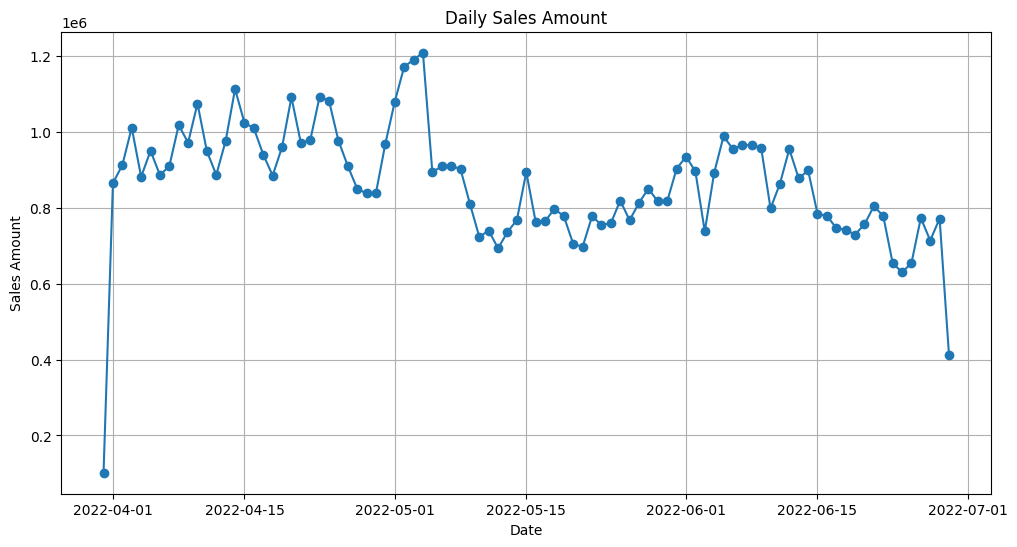

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(daily_sales, marker='o', linestyle='-')
plt.title('Daily Sales Amount')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.grid(True)
plt.show()


**Time Series Conclusion**

1. Seasonal and Trend Components

    There is a noticeable upward trend in sales from early April to mid-May.
    From mid-May onwards, there is a decline in sales, followed by fluctuations with a downward trend towards the end of June.

2. Volatility and Fluctuations

    Sales show considerable volatility with multiple peaks and troughs throughout the observed period.
    There are periods of sharp increases and decreases in daily sales, indicating possible promotions, seasonal effects, or other external factors impacting sales.

3. Outliers

    The data contains some outliers, particularly at the start of April and the end of June, where sales drop sharply.

4. Stability and Decline:

    The period from mid-May to the end of June shows a decline in the overall level of sales, with less pronounced peaks compared to earlier periods.
    Recommendations for Further Analysis

Step 4: Decompose the Time Series

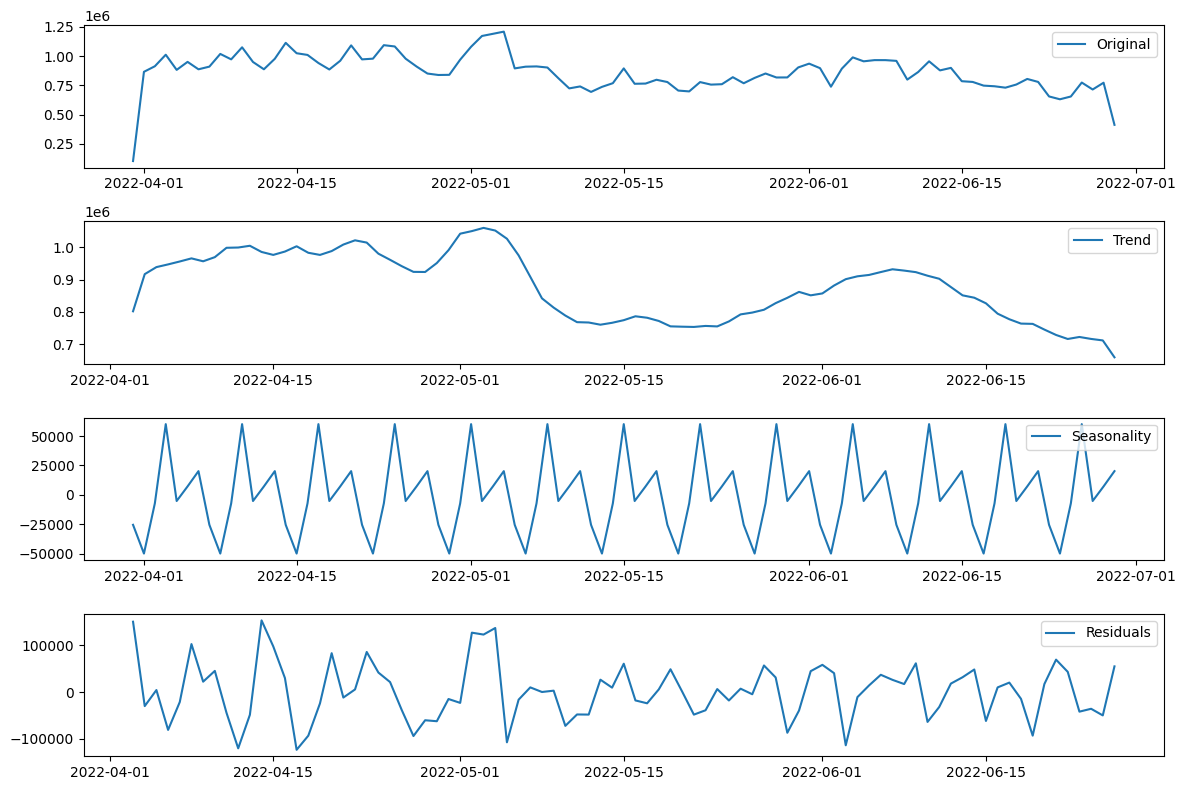

In [ ]:
# Decompose the time series
decomposition = seasonal_decompose(daily_sales, model='additive')

# Plot the decomposed components
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(daily_sales, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='best')

plt.tight_layout()
plt.show()


Step 5: Apply a Time Series Forecasting Method (ARIMA)

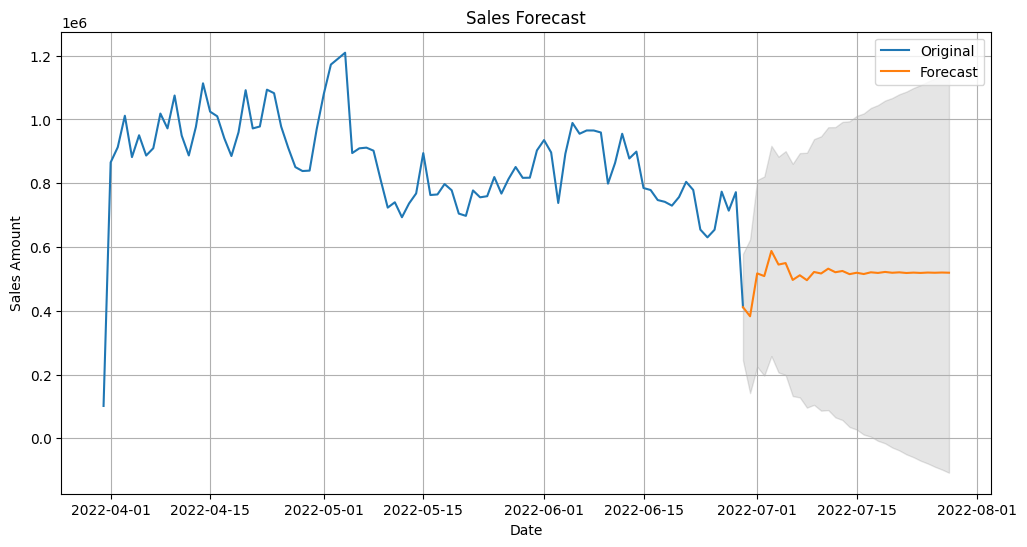

In [ ]:
# Define the model
model = ARIMA(daily_sales, order=(5, 1, 0))

# Fit the model
model_fit = model.fit()

# Make predictions
forecast = model_fit.get_forecast(steps=30)
forecast_index = pd.date_range(start=daily_sales.index[-1], periods=30, freq='D')
forecast_values = forecast.predicted_mean
conf_int = forecast.conf_int()

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(daily_sales, label='Original')
plt.plot(forecast_index, forecast_values, label='Forecast')
plt.fill_between(forecast_index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='k', alpha=0.1)
plt.title('Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.legend(loc='best')
plt.grid(True)
plt.show()


Step 6: Evaluate the Model

Mean Squared Error: 25242427503.15958


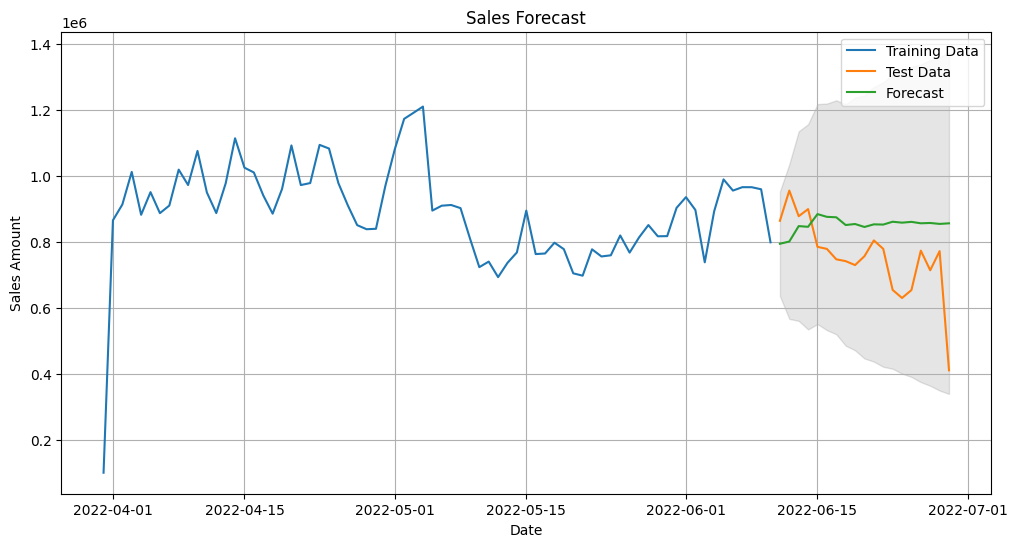

In [ ]:
# Split the data into training and test sets
train_size = int(len(daily_sales) * 0.8)
train, test = daily_sales[0:train_size], daily_sales[train_size:]

# Fit the model on training data
model = ARIMA(train, order=(5, 1, 0))
model_fit = model.fit()

# Make predictions on test data
forecast = model_fit.get_forecast(steps=len(test))
forecast_values = forecast.predicted_mean

# Calculate the mean squared error
mse = mean_squared_error(test, forecast_values)
print(f'Mean Squared Error: {mse}')

# Plot the forecast against the actual outcomes
plt.figure(figsize=(12, 6))
plt.plot(train, label='Training Data')
plt.plot(test.index, test, label='Test Data')
plt.plot(test.index, forecast_values, label='Forecast')
plt.fill_between(test.index, forecast.conf_int().iloc[:, 0], forecast.conf_int().iloc[:, 1], color='k', alpha=0.1)
plt.title('Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.legend(loc='best')
plt.grid(True)
plt.show()